<a href="https://colab.research.google.com/github/crystalclcm/Forecasting_CA/blob/main/Forecasting_nonseasonal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**forecasting a non-seasonal dataset using weekly Police-reported injury crashes on state highways in California Gavin Muldoon C21455374, crystal matticks C21352743**

**project brief**

when choosing a non-seasonal dataset,we chose Police-reported injury crashes on state highways in California as it is clear to see the erratic nature of the data with the it holding a random tendencies within the data. The data itself is one that doesnt hold many trends or common occurances happenng periodically, it is a dataset filled with pure chance which supports the non-seasonal category it is placed in. We wanted to display this in or graphs by having no readable flow or trends that can be picked out from looking at the graph.
The source we used to get this data:- https://tims.berkeley.edu/covid19.php

**Project details**

The tools used in order to record,display and analyse the non-seasonal data set was the Dickey-fuller Test, Arima and Sarimax. From these tools/models used we were able to gather the most accurate model fro this specific data set.

In [ ]:
#importing necessary tools
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook
from itertools import product
from pandas import read_csv
from typing import Union


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from statsmodels.tsa.seasonal import seasonal_decompose, STL

import warnings
warnings.filterwarnings('ignore')
 

In [ ]:
df = pd.read_excel('Books.xlsx')

print(df)

         week  crashes
0  2022-01-06      783
1  2022-01-13      892
2  2022-01-20      942
3  2022-01-27      951
4  2022-02-03      954
5  2022-02-10     1150
6  2022-02-17     1060
7  2022-02-24     1035
8  2022-03-02     1070
9  2022-03-09     1042
10 2022-03-16     1098
11 2022-03-23     1091
12 2022-03-30      993
13 2022-04-06     1098
14 2022-04-13      993
15 2022-04-20     1039
16 2022-04-27     1097
17 2022-05-04     1105
18 2022-05-11     1135
19 2022-05-18     1043
20 2022-05-25      986
21 2022-06-01     1002
22 2022-06-08     1085
23 2022-06-15      986
24 2022-06-22     1061
25 2022-06-29     1030
26 2022-07-06     1013
27 2022-07-13     1109
28 2022-07-20     1016
29 2022-07-27     1038
30 2022-08-03     1086
31 2022-08-10     1112
32 2022-08-17     1094
33 2022-08-24     1108
34 2022-08-31     1108
35 2022-09-07     1050
36 2022-09-14     1136
37 2022-09-21     1176
38 2022-09-28     1168
39 2022-10-05     1114
40 2022-10-12     1216
41 2022-10-19     1167
42 2022-10-

**car** **crashes**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
 

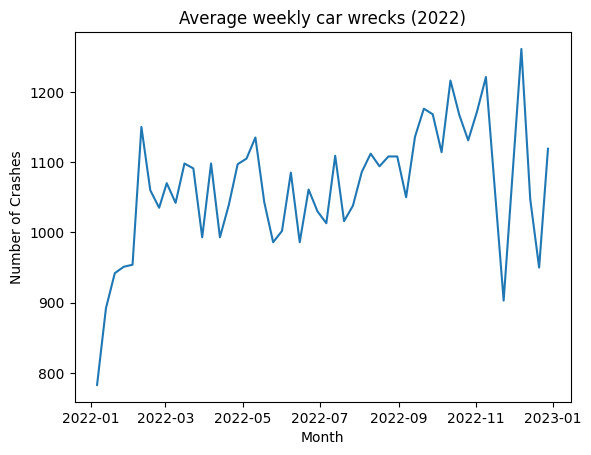

In [ ]:
plt.plot(df['week'], df['crashes'])
plt.xlabel('Month')
plt.ylabel('Number of Crashes')
plt.title('Average weekly car wrecks (2022)')
plt.show()



The car crash dataset in California is a good example of a non-seasonal forecast trend because it does not exhibit a clear and consistent pattern of seasonal variation over time. Instead, car crashes in California are influenced by a complex interplay of factors, including driver behavior, road conditions, and weather patterns, which can vary significantly throughout the year.

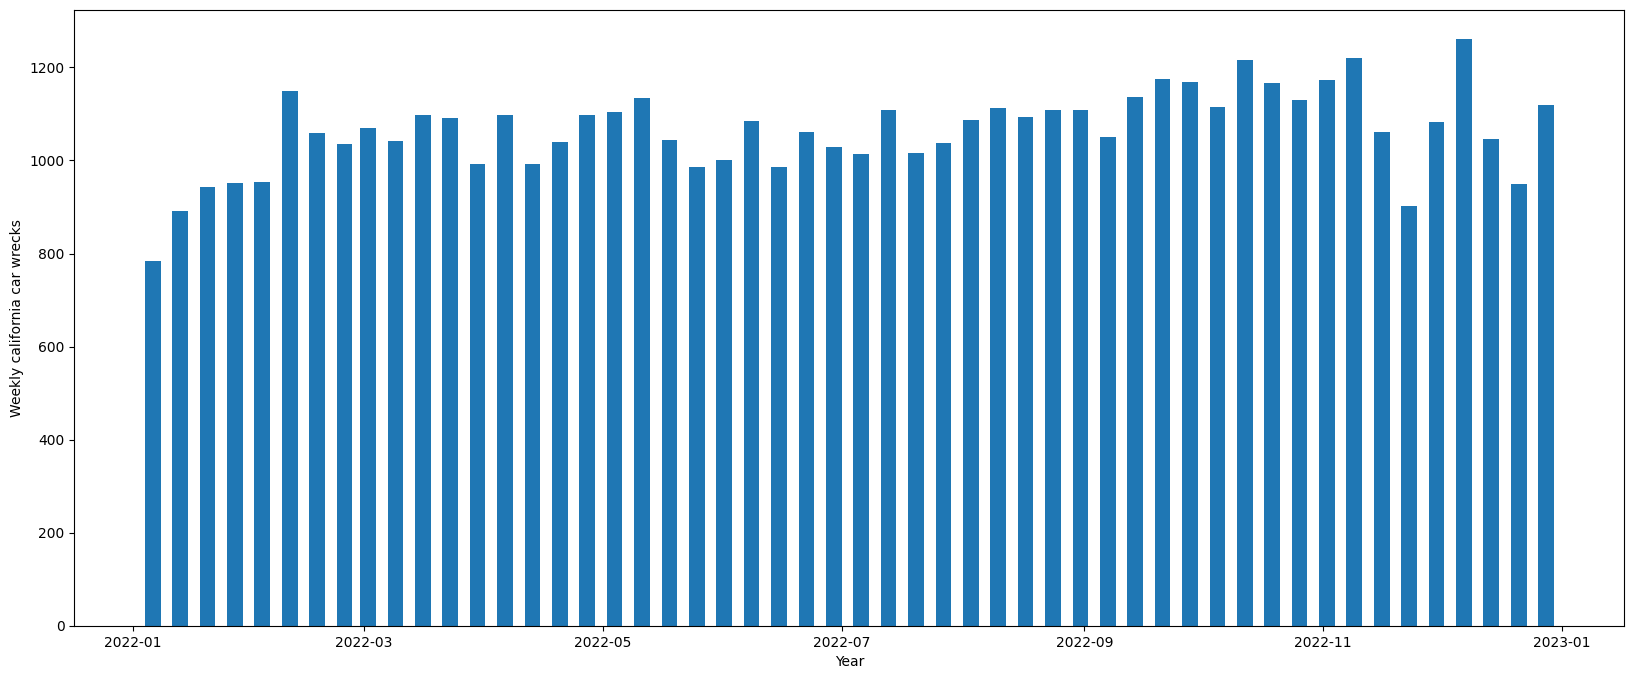

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
#setting Y and X axis along with labels for the graph
x_axis = df['week']
y_axis = df['crashes']
plt.bar(x_axis, y_axis, width=4)
plt.xlabel("Year")
plt.ylabel("Weekly california car wrecks")

plt.show()

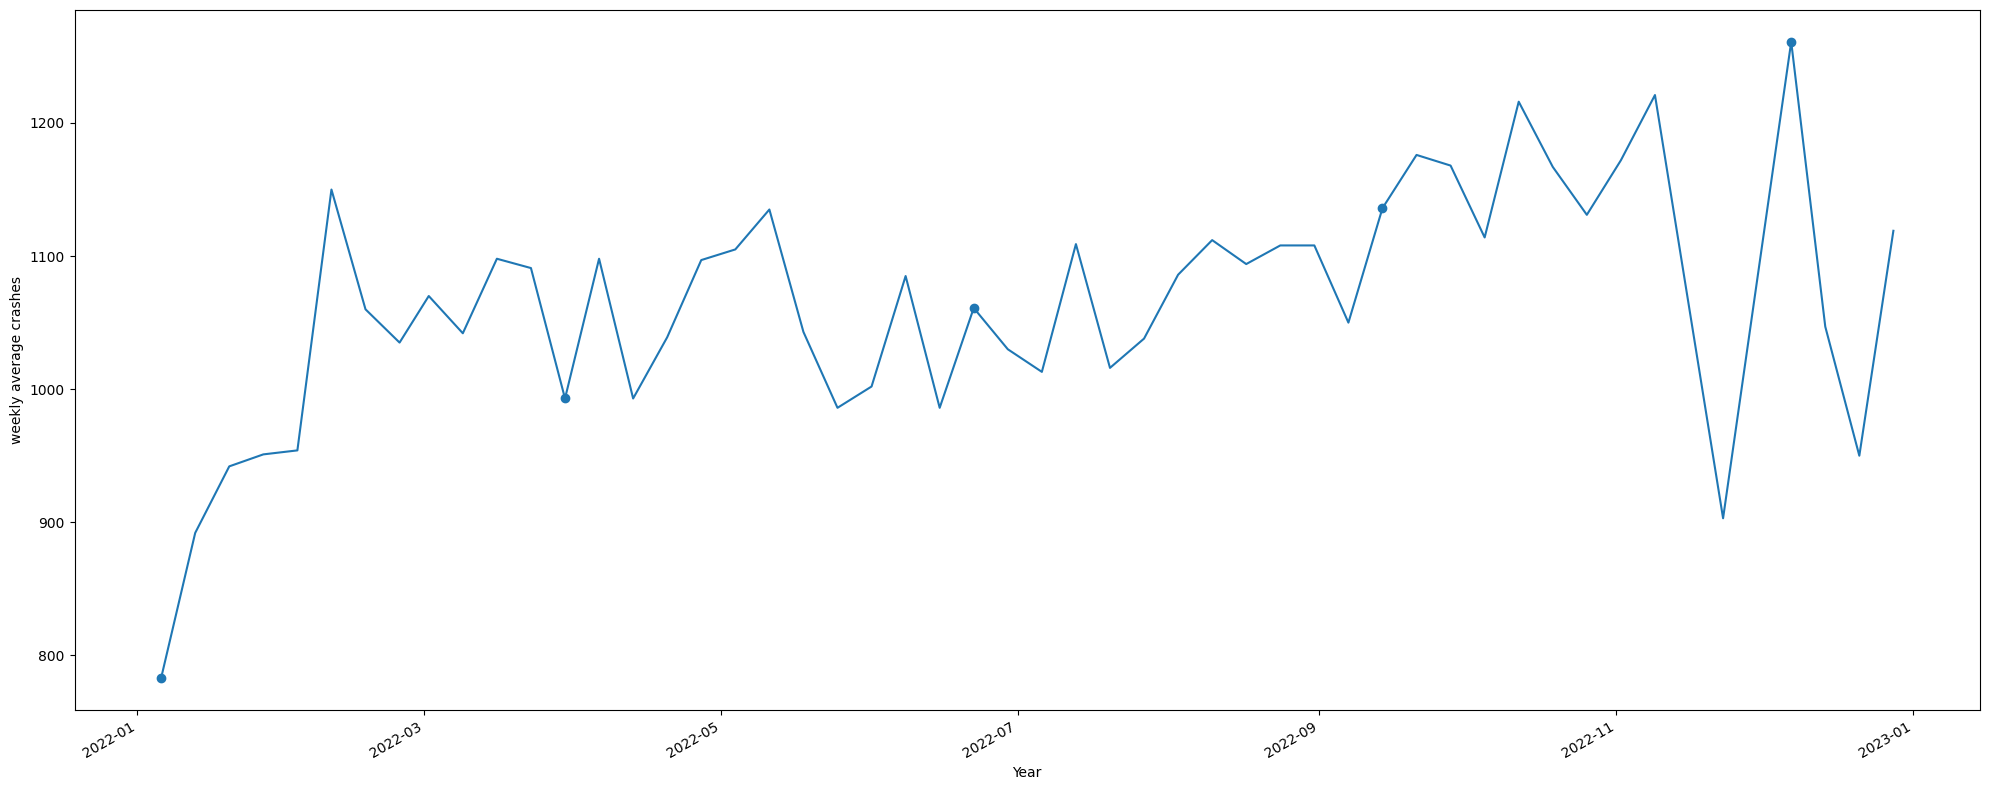

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
#adding markers
ax.plot(df['week'],df['crashes'], markevery=np.arange(0, 52, 12), marker='o') 
ax.set_xlabel('Year')
ax.set_ylabel('weekly average crashes')



fig.autofmt_xdate()
plt.tight_layout()

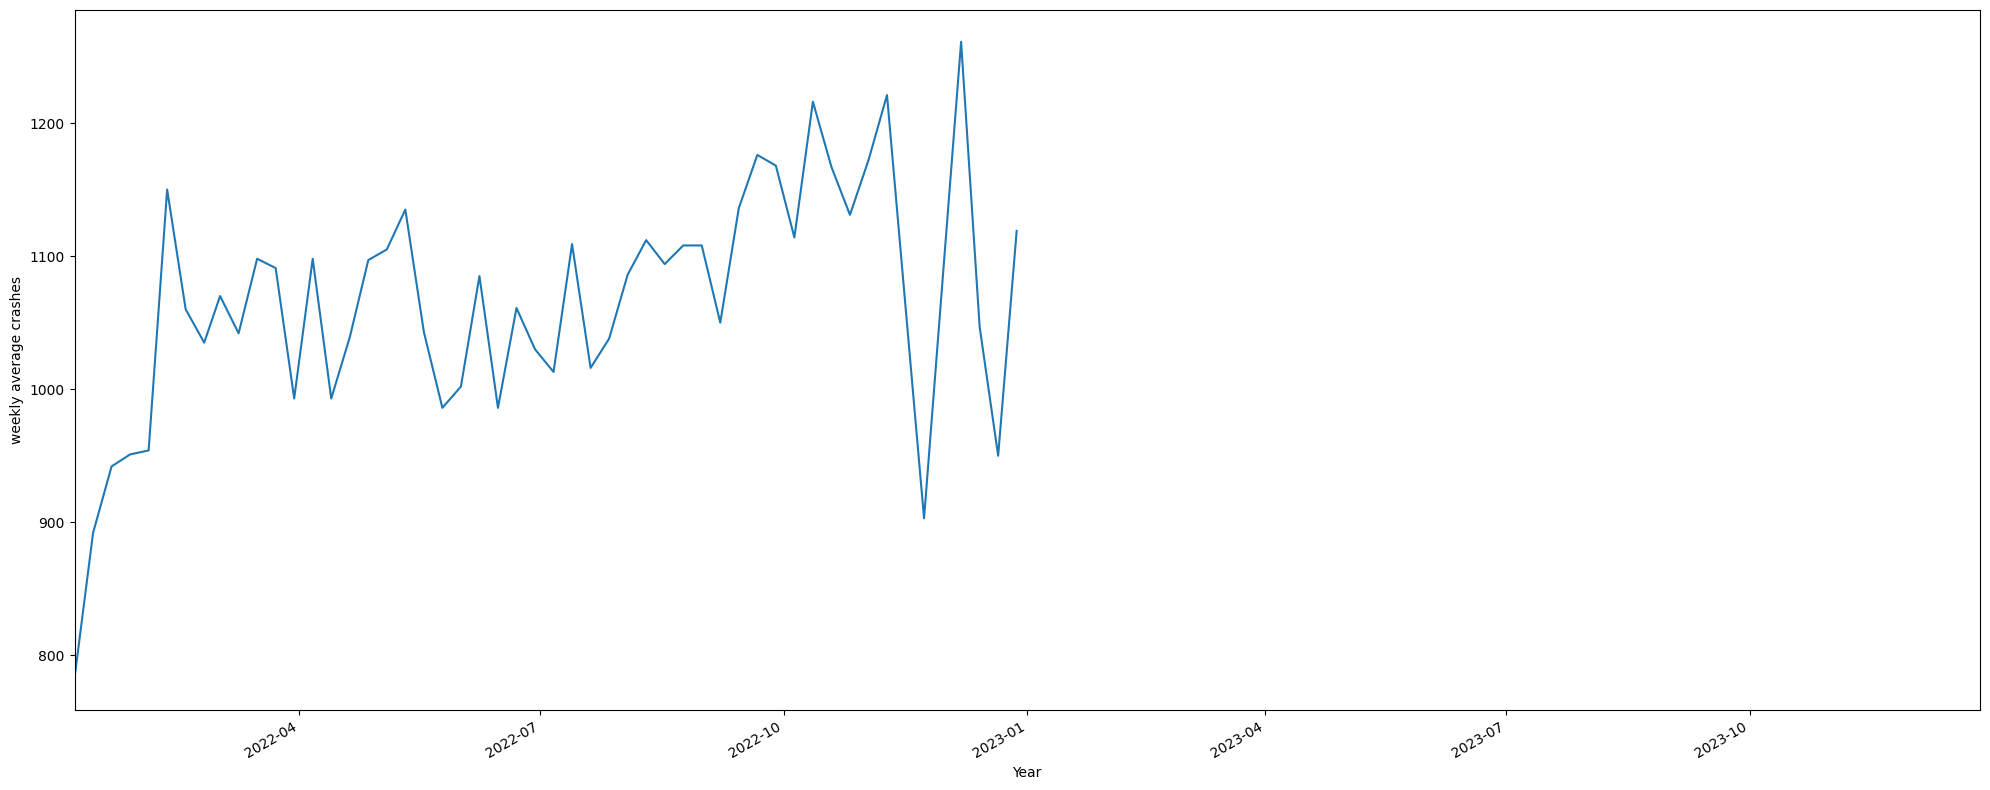

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))

ax.plot(df['week'],df['crashes']) 

for i in np.arange(0, 52, 12):
    ax.axvline(x=i, linestyle='--', color='black', linewidth=1)
ax.set_xlabel('Year')
ax.set_ylabel('weekly average crashes')

ax.set_xlim(pd.Timestamp('2022-01-06'), pd.Timestamp('2023-12-27'))
fig.autofmt_xdate()
plt.tight_layout()

In [ ]:
advanced_decomposition = STL(df.crashes, period=4).fit()

ValueError: ignored

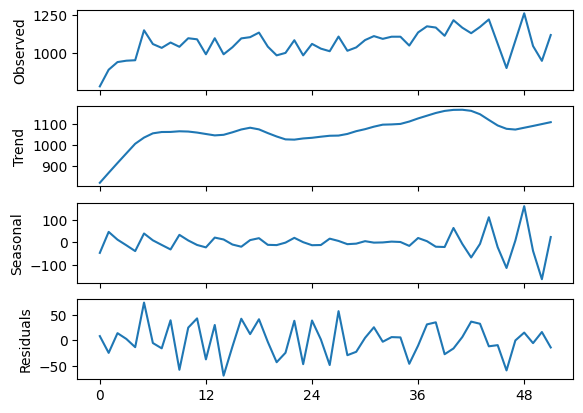

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True)

ax1.plot(advanced_decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(advanced_decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(advanced_decomposition.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(advanced_decomposition.resid)
ax4.set_ylabel('Residuals')

plt.xticks(np.arange(0,52,12), [2022,2023])

fig.autofmt_xdate()
plt.tight_layout()


ValueError: ignored

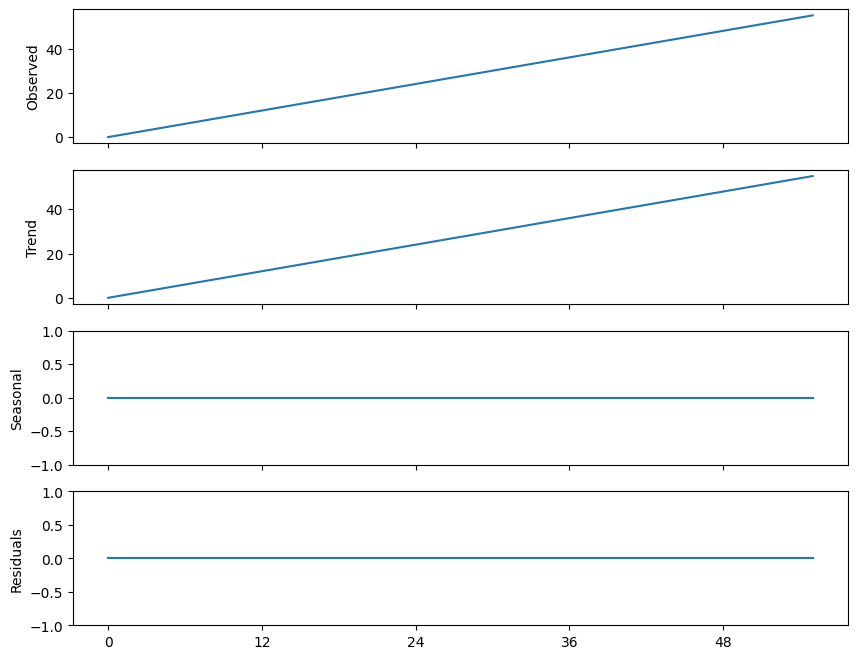

In [ ]:
linear_ts = np.arange(0, 56, 1)

decomposition = STL(linear_ts, period=12).fit()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(10,8))

ax1.plot(decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(decomposition.seasonal)
ax3.set_ylabel('Seasonal')
ax3.set_ylim(-1, 1)

ax4.plot(decomposition.resid)
ax4.set_ylabel('Residuals')
ax4.set_ylim(-1, 1)

plt.xticks(np.arange(0,52,12), [2022,2023])

fig.autofmt_xdate()
plt.tight_layout()

In [ ]:
df_diff = np.diff(df['crashes'], n=1)

ad_fuller_result = adfuller(df_diff)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -6.7084665047978635
p-value: 3.732764997269686e-09


In [ ]:
df_diff = np.diff(df['crashes'], n=1)

ad_fuller_result = adfuller(df_diff)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -6.7084665047978635
p-value: 3.732764997269686e-09


In [ ]:
df_diff = np.diff(df['crashes'], n=1)

ad_fuller_result = adfuller(df_diff)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -6.7084665047978635
p-value: 3.732764997269686e-09


In [ ]:
df_diff_seasonal_diff = np.diff(df_diff, n=12)

ad_fuller_result = adfuller(df_diff_seasonal_diff)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -5.767060642648564
p-value: 5.501391748596443e-07


In [ ]:
df_diff2 = np.diff(df_diff, n=1)

ad_fuller_result = adfuller(df_diff2)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -5.004711296356677
p-value: 2.1721576755318e-05


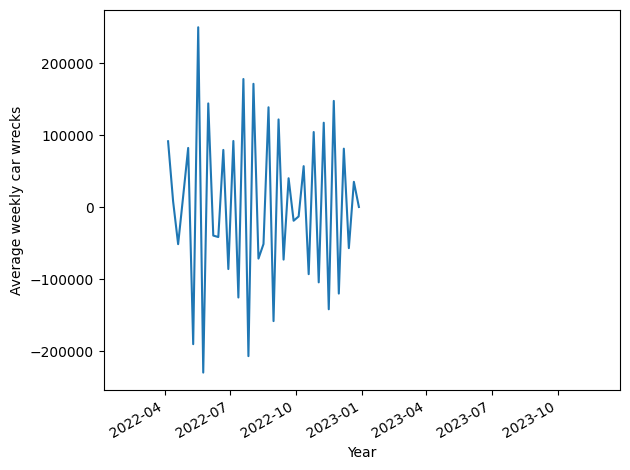

In [ ]:
fig, ax = plt.subplots()

ax.plot(df['week'][13:],df_diff_seasonal_diff)
ax.set_xlabel('Year')

ax.set_ylabel('Average weekly car wrecks')


ax.set_xlim(pd.Timestamp('2022-01-06'), pd.Timestamp('2023-12-27'))
fig.autofmt_xdate()
plt.tight_layout()


The p-value of seasonal difference after first difference is 3.732764997269686e-09, which is small and lower then 0.05 .So there is evidence to reject the null hypothesis.

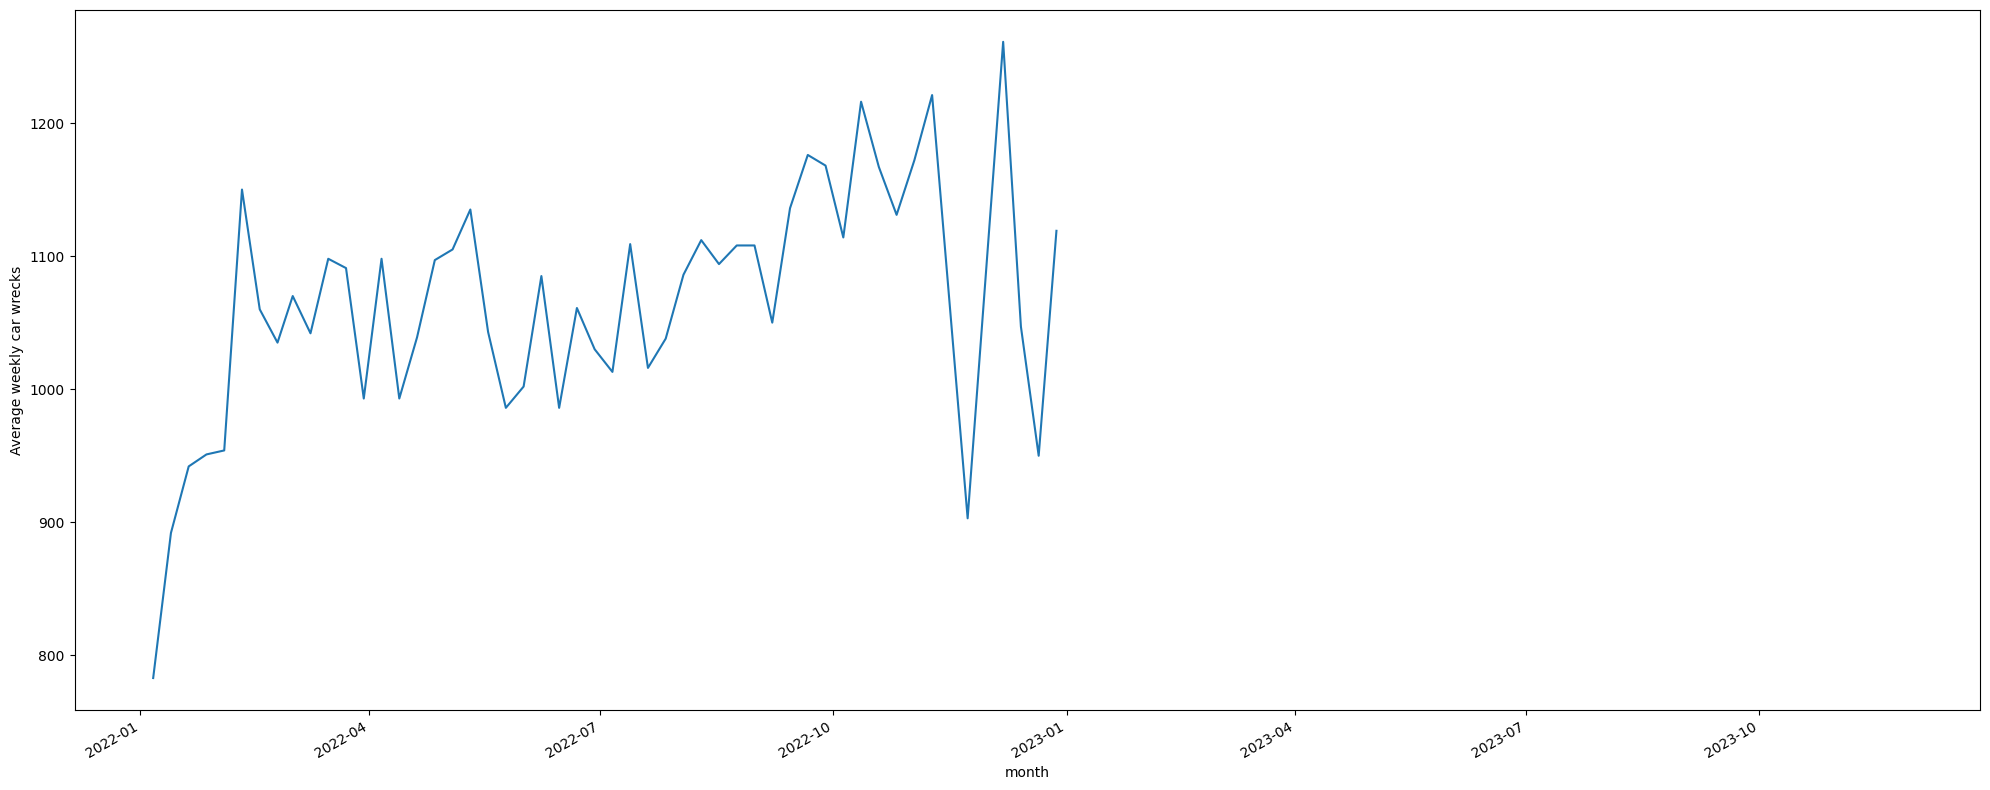

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))

ax.plot(df['week'],df['crashes'])


ax.set_xlabel('month')

ax.set_ylabel('Average weekly car wrecks')

ax.axvspan(48, 59, color='#808080', alpha=0.2)

ax.axvspan(0, 48, color='#e9a296', alpha=0.1)

ax.set_xlim(pd.Timestamp('2021-12-06'), pd.Timestamp('2023-12-27'))

fig.autofmt_xdate()

plt.tight_layout()


In [ ]:
def optimize_ARIMA(training_data, order_list, d) -> pd.DataFrame:
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try: 
            model = SARIMAX(training_data, order=(order[0], d, order[1]), simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        bic= model.bic
        results.append([order, aic, bic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC','BIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [ ]:
ps = range(0, 4, 1)
qs = range(0, 4, 1)
d = 2

order_list = list(product(ps, qs))
order_list

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3)]

In [ ]:
order_list

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3)]

In [ ]:
train = df['crashes'][:-4]

result_df = optimize_ARIMA(train, order_list, d)
result_df

  0%|          | 0/16 [00:00<?, ?it/s]

,"(p,q)",AIC,BIC
0,"(2, 1)",532.317204,539.631770
1,"(0, 2)",532.471702,537.957626
2,"(0, 3)",533.316024,540.630589
3,"(1, 3)",533.475159,542.618366
4,"(2, 2)",533.981762,543.124969
5,"(3, 1)",534.080789,543.223996
6,"(3, 2)",535.630769,546.602617
7,"(2, 3)",535.900644,546.872493
8,"(1, 1)",536.601382,542.087306
9,"(3, 3)",536.820635,549.621125


In [ ]:
model = SARIMAX(train, order=(3,2,3), simple_differencing=False)
model_fit = model.fit(disp=False)

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                crashes   No. Observations:                   48
Model:               SARIMAX(3, 2, 3)   Log Likelihood                -261.410
Date:                Mon, 08 May 2023   AIC                            536.821
Time:                        23:28:49   BIC                            549.621
Sample:                             0   HQIC                           541.616
                                 - 48                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0447      0.432     -2.417      0.016      -1.892      -0.198
ar.L2         -0.4291      0.595     -0.722      0.471      -1.595       0.737
ar.L3         -0.2346      0.301     -0.778      0.4

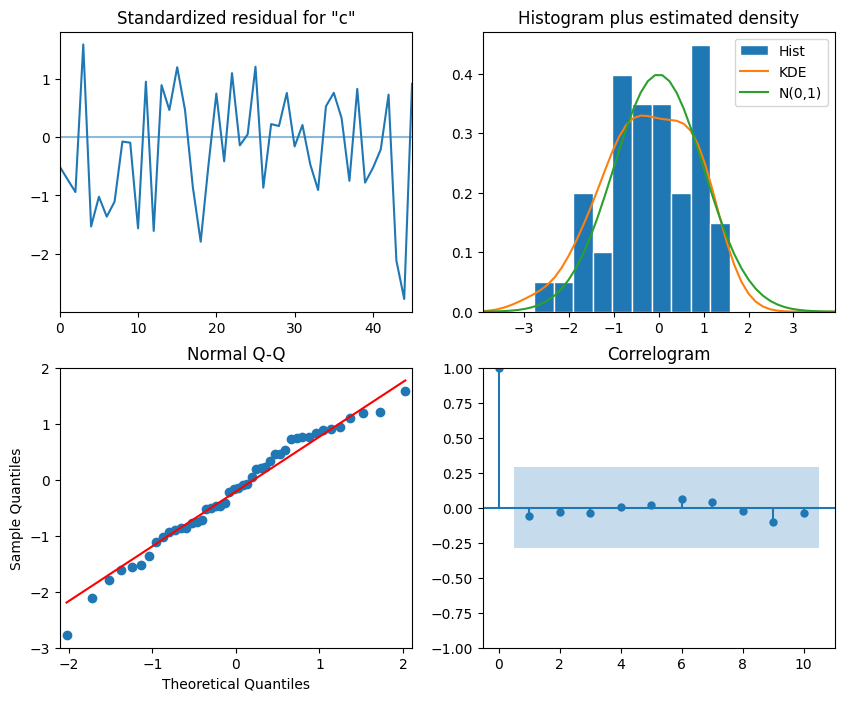

In [ ]:
model_fit.plot_diagnostics(figsize=(10,8));

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox


residuals = model_fit.resid


acorr_ljungbox(residuals, np.arange(1, 11, 1))

,lb_stat,lb_pvalue
1,2.593191,0.107324
2,2.644893,0.266483
3,2.764576,0.429365
4,3.237780,0.518850
5,4.563132,0.471481
6,4.700827,0.582716
7,4.728102,0.693104
8,4.928618,0.765178
9,5.377376,0.800249
10,5.379583,0.864423


In [ ]:
test = df.iloc[-4:]

test['naive_seasonal'] = df['crashes'].iloc[48:52].values
test

,week,crashes,naive_seasonal
48,2022-12-07,1261,1261
49,2022-12-14,1047,1047
50,2022-12-21,950,950
51,2022-12-28,1119,1119


In [ ]:
ARIMA_pred = model_fit.get_prediction(49, 52).predicted_mean

test['ARIMA_pred'] = ARIMA_pred
test

,week,crashes,naive_seasonal,ARIMA_pred
48,2022-12-07,1261,1261,NaN
49,2022-12-14,1047,1047,934.827308
50,2022-12-21,950,950,928.464433
51,2022-12-28,1119,1119,904.593268
